In [1]:
#IMPORTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings("ignore")

In [2]:
#DATA LOADING
#ld.size
ld = pd.read_csv (r'hotel_bookings.csv')
ld.head(2999)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,Resort Hotel,1,39,2015,November,46,10,0,5,1,...,No Deposit,281.0,NaN,0,Transient-Party,40.0,0,0,Canceled,2015-10-10
2995,Resort Hotel,1,42,2015,November,46,10,0,5,2,...,No Deposit,250.0,NaN,0,Transient,47.7,0,0,Canceled,2015-10-16
2996,Resort Hotel,1,39,2015,November,46,10,0,5,1,...,No Deposit,281.0,NaN,0,Transient-Party,40.0,0,0,Canceled,2015-10-10
2997,Resort Hotel,0,36,2015,November,46,10,0,5,2,...,No Deposit,250.0,NaN,0,Transient,73.2,1,0,Check-Out,2015-11-15


In [3]:
#Dropped rows where the bookings were cancelled to capture actual total number of people.

ld = ld[ld.is_canceled != 1]
ld.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75166 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           75166 non-null  object 
 1   is_canceled                     75166 non-null  int64  
 2   lead_time                       75166 non-null  int64  
 3   arrival_date_year               75166 non-null  int64  
 4   arrival_date_month              75166 non-null  object 
 5   arrival_date_week_number        75166 non-null  int64  
 6   arrival_date_day_of_month       75166 non-null  int64  
 7   stays_in_weekend_nights         75166 non-null  int64  
 8   stays_in_week_nights            75166 non-null  int64  
 9   adults                          75166 non-null  int64  
 10  children                        75166 non-null  float64
 11  babies                          75166 non-null  int64  
 12  meal                           

In [4]:
#DATA CLEANING
# Checking for NaN values
ld.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                             421
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12310
company                           69560


In [5]:
# We see that country, agent, company, babies columns have NaN values
# these we want to either remove or fix, so that we won't get 
# inaccurate results based on these

In [6]:
# Check country data
ld['country'].describe()

count     74745
unique      165
top         PRT
freq      21071
Name: country, dtype: object

In [7]:
#List of occurences of each country
country = ld['country']
country = pd.DataFrame(country.value_counts())
print(country)

     country
PRT    21071
GBR     9676
FRA     8481
ESP     6391
DEU     6069
..       ...
KIR        1
NCL        1
BDI        1
MAC        1
LCA        1

[165 rows x 1 columns]


In [8]:
# Here we see single NaN value we have in the dataset
ld[ld['country'].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
30,Resort Hotel,0,118,2015,July,27,1,4,10,1,...,No Deposit,NaN,NaN,0,Transient,62.0,0,2,Check-Out,2015-07-15
13803,Resort Hotel,0,7,2016,January,3,13,0,2,1,...,No Deposit,94.0,NaN,0,Transient,27.0,0,0,Check-Out,2016-01-15
13804,Resort Hotel,0,7,2016,January,4,18,1,3,1,...,No Deposit,NaN,94.0,0,Transient,28.5,1,0,Check-Out,2016-01-22
13807,Resort Hotel,0,7,2016,January,3,13,0,2,1,...,No Deposit,94.0,NaN,0,Transient,27.0,0,0,Check-Out,2016-01-15
13809,Resort Hotel,0,7,2016,September,38,13,0,2,1,...,No Deposit,94.0,NaN,0,Transient,66.0,1,0,Check-Out,2016-09-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31085,Resort Hotel,0,0,2016,December,51,14,0,0,1,...,No Deposit,NaN,178.0,0,Transient,0.0,0,0,Check-Out,2016-12-14
31594,Resort Hotel,0,31,2016,December,53,30,0,2,1,...,No Deposit,NaN,NaN,0,Transient-Party,222.5,0,1,Check-Out,2017-01-01
33087,Resort Hotel,0,4,2017,February,7,13,1,1,1,...,No Deposit,NaN,135.0,0,Transient,38.5,1,0,Check-Out,2017-02-15
80830,City Hotel,0,4,2015,November,48,23,1,2,1,...,No Deposit,37.0,NaN,0,Transient-Party,70.0,0,0,Check-Out,2015-11-26


In [9]:
# Here we see that PRT is the most likely country to fit this NaN
# therefore we will fill the NaN with PRT
ld['country'] = ld['country'].fillna('Unknown')

# now we shouldn't have any NaN values in the country column anymore
ld['country'].isnull().sum()

0

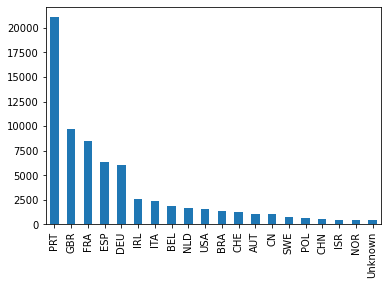

In [10]:
# plot country results
ld['country'].value_counts()[:20].plot(kind='bar')

In [11]:
# Now we will clean the company column
ld['company'].describe()

count    5606.000000
mean      190.519265
std       132.349286
min         6.000000
25%        51.000000
50%       183.000000
75%       270.000000
max       541.000000
Name: company, dtype: float64

In [12]:
ld['company'].value_counts()

40.0     850
223.0    665
45.0     222
153.0    167
219.0    132
        ... 
126.0      1
417.0      1
35.0       1
489.0      1
305.0      1
Name: company, Length: 331, dtype: int64

In [13]:
# We know there is 3000 entries in the dataset and the company column
# contains 2876 NaN values. This is most of the entries
print(2876/3000 * 100, "% NaN values in 'company'")

95.86666666666666 % NaN values in 'company'


In [14]:
# Givin that 96% of the Values in the company column is NaN 
# instead of modifying the data is might be better to just remove
# the column itself, which we will
ld = ld.drop(['company'], axis=1)

In [15]:
ld.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                               0
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12310
days_in_waiting_list                  0


In [16]:
# Now we only have the agent column left with NaN values
# and will try to analyse what we can do with this
ld['agent'].describe()

count    62856.000000
mean        94.055794
std        113.947162
min          1.000000
25%          9.000000
50%         14.000000
75%        240.000000
max        535.000000
Name: agent, dtype: float64

In [17]:
ld['agent'].value_counts()

9.0      18697
240.0     8438
7.0       3065
14.0      2988
250.0     2357
         ...  
59.0         1
408.0        1
197.0        1
450.0        1
280.0        1
Name: agent, Length: 314, dtype: int64

In [18]:
ld[ld['agent'].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,0,No Deposit,NaN,0,Transient,107.00,0,0,Check-Out,2015-07-03
18,Resort Hotel,0,0,2015,July,27,1,0,1,2,...,0,No Deposit,NaN,0,Transient,107.42,0,0,Check-Out,2015-07-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119124,City Hotel,0,0,2017,August,35,29,0,1,1,...,0,No Deposit,NaN,0,Transient,0.00,0,2,Check-Out,2017-08-30
119151,City Hotel,0,0,2017,August,35,29,0,1,2,...,0,No Deposit,NaN,0,Transient,270.00,0,0,Check-Out,2017-08-30
119166,City Hotel,0,0,2017,August,35,30,0,1,1,...,0,No Deposit,NaN,0,Transient,140.00,0,0,Check-Out,2017-08-31
119215,City Hotel,0,2,2017,August,35,31,0,1,1,...,0,No Deposit,NaN,0,Transient,140.00,0,2,Check-Out,2017-09-01


In [19]:
# The agent column feature as an ID of the traveling agency that made
# the booking. We first thought about just removing this column also
# from the dataset, but thinking straight we can just keep these data, 
# as the booking made from no agency, directly at the hotels.
# But since we don't wan't any NaN values in our dataset, we will simply
# fill all the NaN values with 0.
ld['agent'] = ld['agent'].fillna('0')
ld['agent'].isnull().sum()

0

In [20]:
# Now we finished cleaning our dataset and it is now ready for use
ld.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [21]:
ld.shape

(75166, 31)

In [22]:
ld = ld.dropna()

In [23]:
ld.shape

(75166, 31)

In [24]:
ld.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [25]:
#
# Section 2
# Data analysis
#
#

In [26]:
# Try to find prediction of amount of people arriving at hotels each month 
correlation = ld.corr()["arrival_date_week_number"]
correlation.abs().sort_values(ascending=False)[1:]

arrival_date_year                 0.543075
lead_time                         0.104068
adr                               0.099312
arrival_date_day_of_month         0.087752
is_repeated_guest                 0.049622
days_in_waiting_list              0.048647
stays_in_week_nights              0.030788
adults                            0.028424
previous_cancellations            0.028363
total_of_special_requests         0.028183
stays_in_weekend_nights           0.025778
previous_bookings_not_canceled    0.025573
children                          0.010603
babies                            0.007685
booking_changes                   0.006362
required_car_parking_spaces       0.004418
is_canceled                            NaN
Name: arrival_date_week_number, dtype: float64

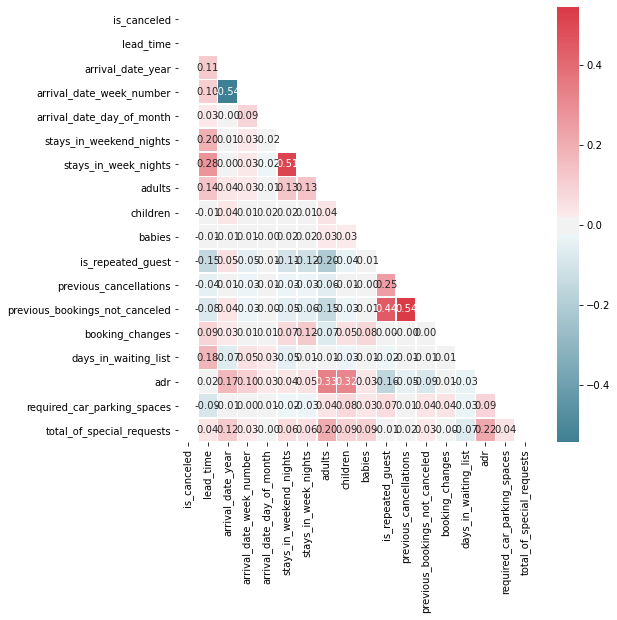

In [27]:
corr = ld.corr()
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

In [28]:
# from this graph we see that the targeted 'arrival_date_week_numbers' 
# 'adr', 'children', 'adult', 'babies', 'total_of_specail_requests'

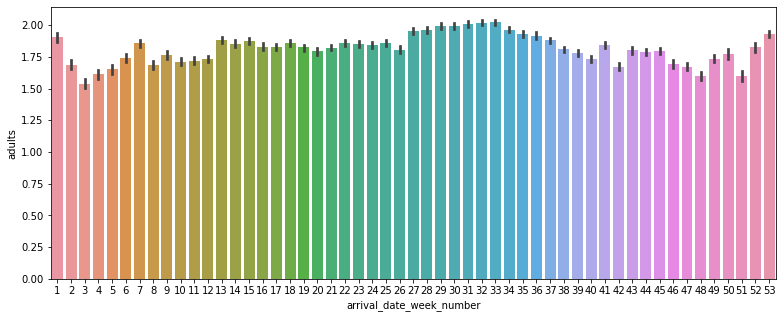

In [29]:
plt.figure(figsize = (13,5))
sns.barplot(x ='arrival_date_week_number', y = 'adults', data = ld)

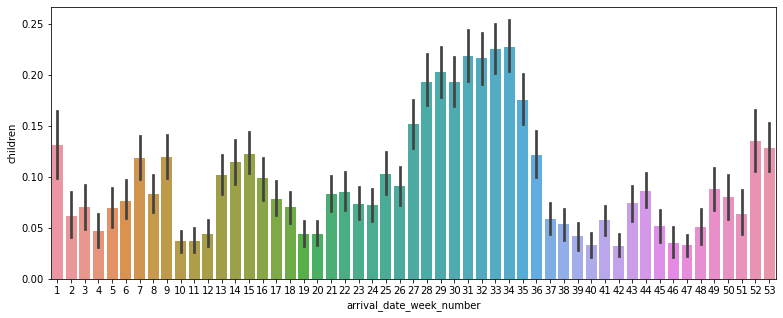

In [30]:
plt.figure(figsize = (13,5))
sns.barplot(x ='arrival_date_week_number', y = 'children', data = ld)

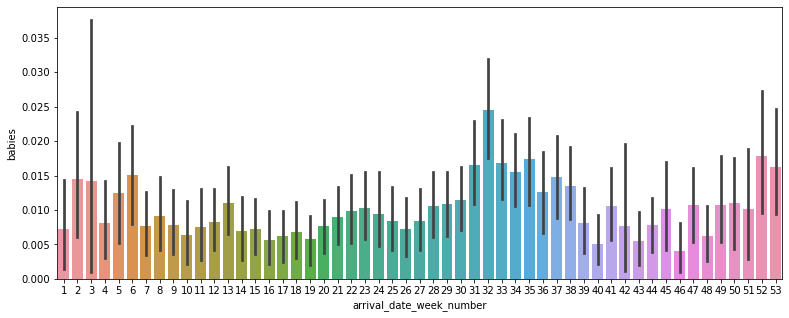

In [31]:
plt.figure(figsize = (13,5))
sns.barplot(x ='arrival_date_week_number', y = 'babies', data = ld)

In [32]:
# sum of all people each month
sum_column = ld["adults"] + ld["children"] + ld['babies']
ld["total_people"] = sum_column

print(ld['total_people'])

0         2.0
1         2.0
2         1.0
3         1.0
4         2.0
         ... 
119385    2.0
119386    3.0
119387    2.0
119388    2.0
119389    2.0
Name: total_people, Length: 75166, dtype: float64


In [33]:
correlation = ld.corr()["total_people"]
correlation.abs().sort_values(ascending=False)[1:]

adults                            0.791963
children                          0.620508
adr                               0.447000
total_of_special_requests         0.226641
babies                            0.205222
is_repeated_guest                 0.179096
previous_bookings_not_canceled    0.128226
stays_in_week_nights              0.112361
stays_in_weekend_nights           0.111982
lead_time                         0.095308
required_car_parking_spaces       0.079023
previous_cancellations            0.057637
arrival_date_year                 0.048492
arrival_date_week_number          0.029138
days_in_waiting_list              0.021944
booking_changes                   0.011522
arrival_date_day_of_month         0.004650
is_canceled                            NaN
Name: total_people, dtype: float64

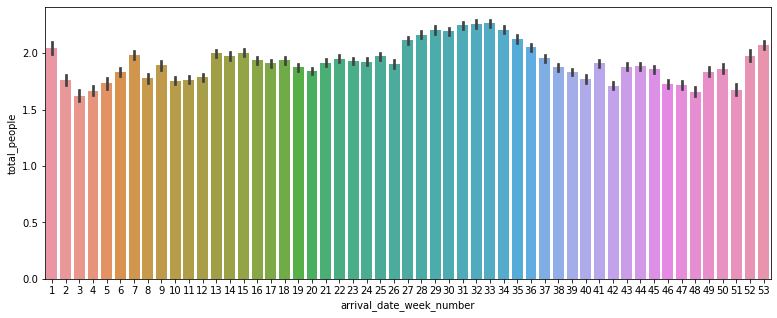

In [34]:
# graph of total people each month
plt.figure(figsize = (13,5))
sns.barplot(x ='arrival_date_week_number', y = 'total_people', data = ld)

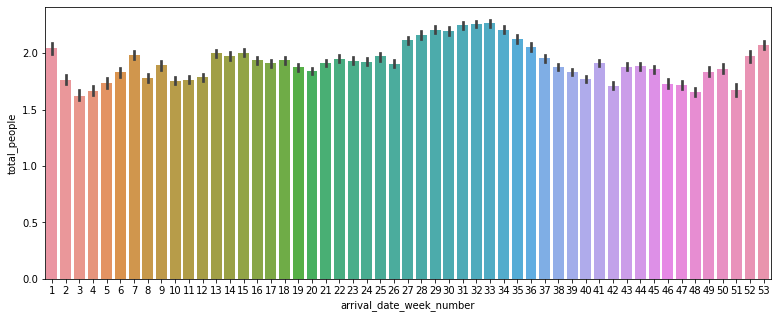

In [35]:
# graph of total people each month
plt.figure(figsize = (13,5))
sns.barplot(x ='arrival_date_week_number', y = 'total_people', data = ld)

In [36]:
ppw = pd.DataFrame(columns = ['week', 'avg_people'])
ppw['week'] = ld['arrival_date_week_number']
ppw['avg_people'] = ld['total_people']
ppw.groupby('week', as_index=True)['avg_people'].mean()

week
1     2.044669
2     1.764277
3     1.623984
4     1.666667
5     1.732848
6     1.832591
7     1.982456
8     1.777934
9     1.892319
10    1.756374
11    1.765840
12    1.785272
13    1.998044
14    1.974162
15    2.005481
16    1.935619
17    1.912400
18    1.936725
19    1.874594
20    1.844288
21    1.915273
22    1.951634
23    1.931657
24    1.926102
25    1.971167
26    1.904575
27    2.114949
28    2.164080
29    2.208930
30    2.196855
31    2.245704
32    2.259713
33    2.264096
34    2.207916
35    2.125150
36    2.052437
37    1.953437
38    1.876695
39    1.831870
40    1.772532
41    1.909485
42    1.713266
43    1.880936
44    1.882777
45    1.857627
46    1.730964
47    1.717341
48    1.658105
49    1.835273
50    1.863436
51    1.676856
52    1.977408
53    2.075939
Name: avg_people, dtype: float64

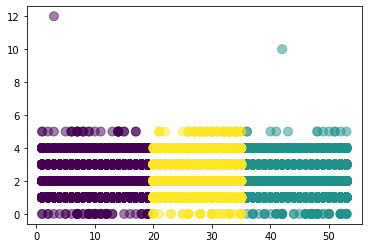

In [37]:
test1 = pd.DataFrame(columns = ['arrival_date_week_number', 'total_people'])
test1['arrival_date_week_number'] = ld['arrival_date_week_number']
test1['total_people'] = ld['total_people']

kmeans = KMeans(n_clusters=3).fit(test1)

plt.scatter(test1['arrival_date_week_number'], test1['total_people'], c= kmeans.labels_.astype(float), s=80, alpha=0.5)
plt.show()

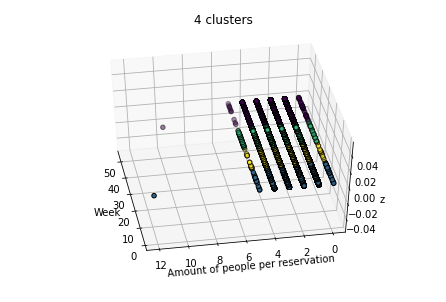

In [38]:
estimators = [('k_means', KMeans(n_clusters=4))]
fignum = 1
titles = ['4 clusters']
for name, est in estimators:
    fig = plt.figure()
    ax = Axes3D(fig, elev=48, azim=170)
    est.fit(test1)
    labels = est.labels_

    ax.scatter(test1['arrival_date_week_number'],test1['total_people'],
               c=labels.astype(np.float), edgecolor='k')


    ax.set_xlabel('Week')
    ax.set_ylabel('Amount of people per reservation')
    ax.set_zlabel('z')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

In [39]:
# data prediction
# splitting dataset
ld_new = ld.copy()[['adr', 'total_of_special_requests', 'is_repeated_guest', 'stays_in_week_nights', 'previous_bookings_not_canceled', 'total_people']]
ld_new.head()

,adr,total_of_special_requests,is_repeated_guest,stays_in_week_nights,previous_bookings_not_canceled,total_people
0,0.0,0,0,0,0,2.0
1,0.0,0,0,0,0,2.0
2,75.0,0,0,1,0,1.0
3,75.0,0,0,1,0,1.0
4,98.0,1,0,2,0,2.0


In [40]:
x = ld_new.drop(['total_people'], axis=1)
y = ld_new['total_people']

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, shuffle=False)

Text(0, 0.5, 'Accuracy')

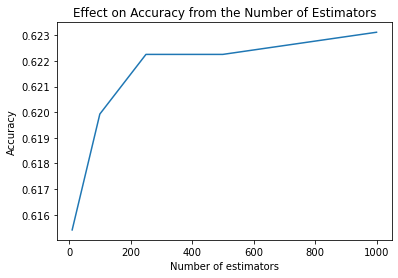

In [42]:
#Checking how increasing the number of estimators affect the accuracy of the predictions

#n_estimators
estimators = [10, 100, 250, 500, 1000]

#Array of results
results = []

for i in estimators:
    rf = RandomForestRegressor(n_estimators = i, random_state = 0)
    rf.fit(x_train, y_train)
    predictions = rf.predict(x_test)
    results.append(metrics.accuracy_score(y_test, predictions.round()))
results
plt.plot(estimators, results)
plt.title("Effect on Accuracy from the Number of Estimators")
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")

In [43]:
#Create a model with 500 estimators
rf = RandomForestRegressor(n_estimators=500, random_state=0)

#Training model with training data
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=0)

In [44]:
predictions = rf.predict(x_test)

errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.46 degrees.


In [45]:
print('Accuracy:', metrics.accuracy_score(y_test, predictions.round()))

Accuracy: 0.6222562192363975
